In [1]:
import numpy as np
import cupy as cp

import poppy
from poppy.poppy_core import PlaneType

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = True

from scoobpsf import scoobm, agpm, zwfs
from scoobpsf.imshows import *
reload(scoobm)

dm_flat = fits.getdata(scoobm.module_path/'scoob_dm_flat.fits')
model = scoobm.SCOOBM(dm_ref=dm_flat)

wavelength_c = model.wavelength_c

Could not import scoobpy. Testbed interface unavailable.


In [2]:
pupil_diam = 9.9*u.mm
fl_oap3 = 462.66806649168853*u.mm
fnum = fl_oap3/pupil_diam

spatial_resolution = wavelength_c*fnum

display(fnum, spatial_resolution)

<Quantity 46.73414813>

<Quantity 2.95733689e-05 m>

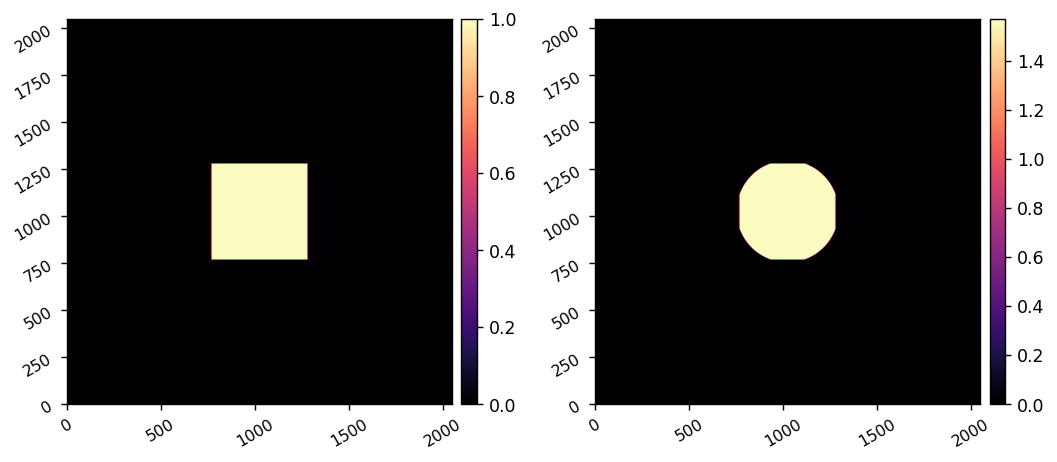

In [11]:
reload(zwfs)
ZWFS = zwfs.IdealZWFS(spatial_resolution=spatial_resolution)

wf = poppy.FresnelWavefront(npix=model.npix, oversample=model.oversample, beam_radius=spatial_resolution/2, wavelength=wavelength_c)
wf *= ZWFS

imshow2(wf.amplitude, wf.phase)
# zwfs_phasor = ZWFS.get_phasor(wf)
# imshow2(xp.abs(zwfs_phasor), xp.angle(zwfs_phasor))

Propagating wavelength 632.800 nm.
462.66806649168853 mm
PSF calculated in 0.197s


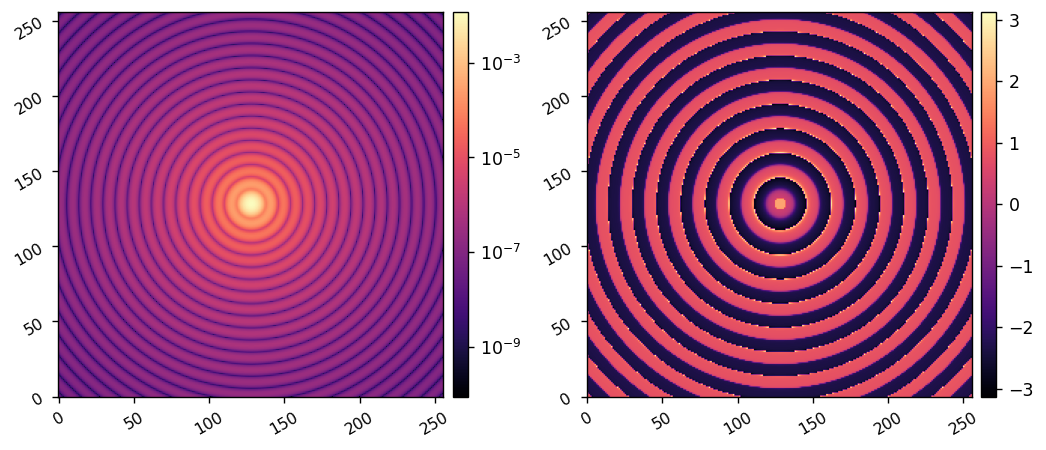

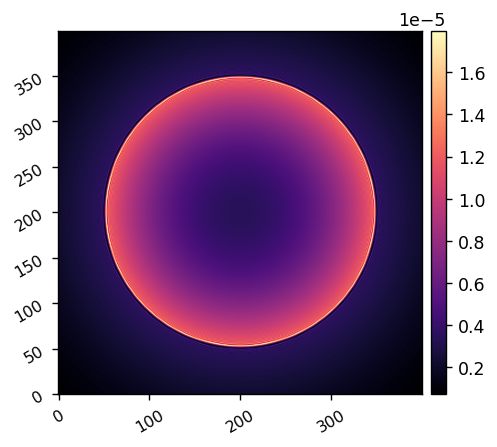

In [20]:
reload(scoobm)
model = scoobm.SCOOBM(dm_ref=dm_flat)
model.zero_dm()
model.npix = 512
model.oversample = 8

model.use_zwfs = True
model.ZWFS = None
model.ZWFS = ZWFS

wfs = model.calc_wfs()

imshow2(wfs[-3].intensity, wfs[-3].phase, npix=256, lognorm1=True)
imshow1(wfs[-1].intensity)

In [49]:
pupil_diam = 9.9*u.mm
fl_oap3 = 462.66806649168853*u.mm
fnum = fl_oap3/pupil_diam

spatial_resolution = wavelength_c*fnum

display(fnum, spatial_resolution)

<Quantity 46.73414813>

<Quantity 2.95733689e-05 m>